In [104]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import io
import seaborn as sns
from google.colab import drive
from google.colab import files
import sklearn
from sklearn.feature_selection import r_regression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import *
from sklearn.linear_model import LinearRegression
from collections import Counter

In [105]:
uploaded = files.upload()
films_dataframe = pd.read_parquet(list(uploaded.keys())[0])

Saving takflix_features_dataframe.p to takflix_features_dataframe (1).p


In [106]:
films_dataframe

,Назва продукту,Жанр,Опис,Час,Рейтинг
0,"Вперед, за скарбами гетьмана!","класика,\n комедія,\n містика",У давнину український гетьман відіслав зі свої...,88 хв.,4
1,Погані дороги (дубляж),"драма,\n воєнний","П’ять розбитих доріг. П’ять історій про любов,...",124 хв.,4.7
2,Аліса в Країні війни,воєнний,"Коли на Майдані починалася революція, Алісі бу...",76 хв.,0
3,Людина з фотоапаратом,"трагікомедія,\n історичний",1990 - Українська Республіка стоїть на шляху с...,40 хв.,4.4
4,Повернутись зі світанком,драма,"Кримськотатарська історія про батька і сина, я...",19 хв.,4.6
...,...,...,...,...,...
121,Кохання,урбаністика,Історія кохання за допомогою символів. Стрічка...,14 хв.,4.2
122,Фучжоу,"класика,\n драма,\n фантасмагорія","Придніпровські містечка й села в Україні, узбе...",120 хв.,5
123,Післясмак,"драма,\n лгбтк","Хлопець повертається у маленьке місто, де зуст...",20 хв.,4.4
124,Трубач,"музичний,\n комедія,\n дитячий",Микола Шевченко — юний трубач дитячого естра...,85 хв.,4.2


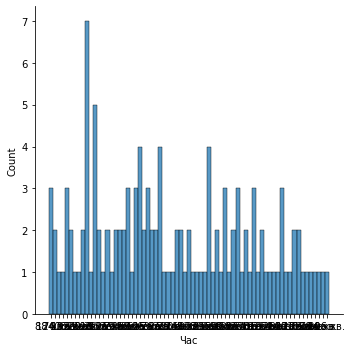

In [107]:
sns.displot(films_dataframe['Час'])

In [108]:
descriptions = films_dataframe['Опис']
descriptions

0      У давнину український гетьман відіслав зі свої...
1      П’ять розбитих доріг. П’ять історій про любов,...
2      Коли на Майдані починалася революція, Алісі бу...
3      1990 - Українська Республіка стоїть на шляху с...
4      Кримськотатарська історія про батька і сина, я...
                             ...                        
121    Історія кохання за допомогою символів. Стрічка...
122    Придніпровські містечка й села в Україні, узбе...
123    Хлопець повертається у маленьке місто, де зуст...
124    Микола Шевченко — юний трубач   дитячого естра...
125    Крим. Юний кримський татарин Азіз закоханий в ...
Name: Опис, Length: 126, dtype: object

In [109]:
vowels = 'АЕЄИІЇОУЮЯ'.lower()
count_consonants = 0
count_vowels = 0
for description in descriptions:
  if description is not None:
    for char in description:
      if char in vowels:
        count_vowels +=1
      else:
        count_consonants +=1
print(count_vowels,count_consonants)    




  


17096 32803


In [110]:
def count_des_vowels(description):
  count_vowels = 0
  vowels = 'АЕЄИІЇОУЮЯ'.lower()
  for char in description:
      if char in vowels:
        count_vowels +=1
  return count_vowels

In [111]:
def count_des_consonants(description):
  count_consonants = 0
  consonants = 'БВГҐДЖ3ЙКЛМНПРСТФXЦЧШЩ'.lower()
  for char in description:
      if char in consonants:
        count_consonants +=1
  return count_consonants

In [112]:
films_dataframe['Кількість голосних'] = films_dataframe['Опис'].apply(count_des_vowels)

In [113]:
films_dataframe['Кількість приголосних'] = films_dataframe['Опис'].apply(count_des_consonants)

In [114]:
films_dataframe['Сумарна кількість'] = films_dataframe['Кількість голосних'] + films_dataframe['Кількість приголосних'] 

In [115]:
films_dataframe['Голосні/Приголосні'] = films_dataframe['Кількість голосних'] / films_dataframe['Сумарна кількість'] 

In [116]:
films_dataframe

,Назва продукту,Жанр,Опис,Час,Рейтинг,Кількість голосних,Кількість приголосних,Сумарна кількість,Голосні/Приголосні
0,"Вперед, за скарбами гетьмана!","класика,\n комедія,\n містика",У давнину український гетьман відіслав зі свої...,88 хв.,4,116,153,269,0.431227
1,Погані дороги (дубляж),"драма,\n воєнний","П’ять розбитих доріг. П’ять історій про любов,...",124 хв.,4.7,46,59,105,0.438095
2,Аліса в Країні війни,воєнний,"Коли на Майдані починалася революція, Алісі бу...",76 хв.,0,269,306,575,0.467826
3,Людина з фотоапаратом,"трагікомедія,\n історичний",1990 - Українська Республіка стоїть на шляху с...,40 хв.,4.4,172,209,381,0.451444
4,Повернутись зі світанком,драма,"Кримськотатарська історія про батька і сина, я...",19 хв.,4.6,38,45,83,0.457831
...,...,...,...,...,...,...,...,...,...
121,Кохання,урбаністика,Історія кохання за допомогою символів. Стрічка...,14 хв.,4.2,86,106,192,0.447917
122,Фучжоу,"класика,\n драма,\n фантасмагорія","Придніпровські містечка й села в Україні, узбе...",120 хв.,5,148,168,316,0.468354
123,Післясмак,"драма,\n лгбтк","Хлопець повертається у маленьке місто, де зуст...",20 хв.,4.4,123,138,261,0.471264
124,Трубач,"музичний,\n комедія,\n дитячий",Микола Шевченко — юний трубач дитячого естра...,85 хв.,4.2,114,139,253,0.450593


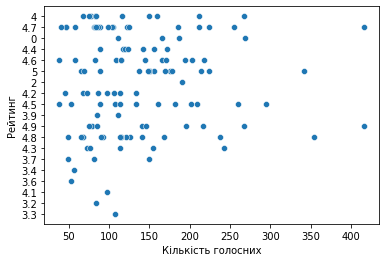

In [117]:
sns.scatterplot(data = films_dataframe, x = films_dataframe['Кількість голосних'], y =films_dataframe['Рейтинг'] )

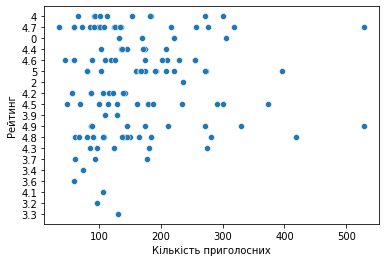

In [118]:
sns.scatterplot(data = films_dataframe, x = films_dataframe['Кількість приголосних'], y =films_dataframe['Рейтинг'] )

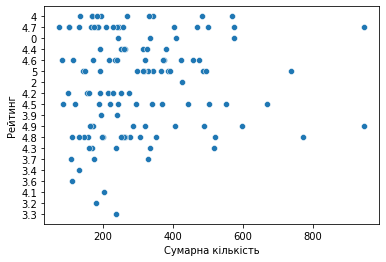

In [119]:
sns.scatterplot(data = films_dataframe, x = films_dataframe['Сумарна кількість'], y =films_dataframe['Рейтинг'] )

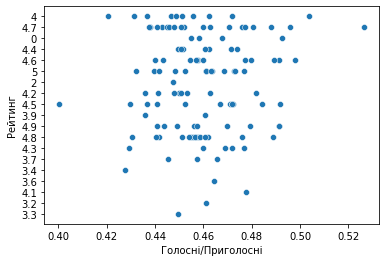

In [120]:
sns.scatterplot(data = films_dataframe, x = films_dataframe['Голосні/Приголосні'], y =films_dataframe['Рейтинг'] )

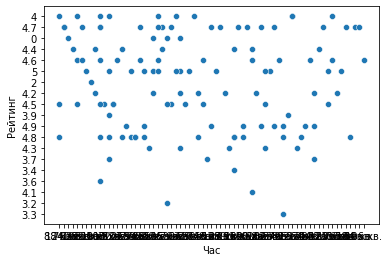

In [121]:
sns.scatterplot(data = films_dataframe, x = films_dataframe['Час'], y =films_dataframe['Рейтинг'] )

In [122]:
def transform_timing_toint(timing):
  timing = timing.replace(" хв.", '')
  return int(timing)
    


In [123]:
films_dataframe['Час'] = films_dataframe['Час'].apply(transform_timing_toint)

In [124]:
films_dataframe

,Назва продукту,Жанр,Опис,Час,Рейтинг,Кількість голосних,Кількість приголосних,Сумарна кількість,Голосні/Приголосні
0,"Вперед, за скарбами гетьмана!","класика,\n комедія,\n містика",У давнину український гетьман відіслав зі свої...,88,4,116,153,269,0.431227
1,Погані дороги (дубляж),"драма,\n воєнний","П’ять розбитих доріг. П’ять історій про любов,...",124,4.7,46,59,105,0.438095
2,Аліса в Країні війни,воєнний,"Коли на Майдані починалася революція, Алісі бу...",76,0,269,306,575,0.467826
3,Людина з фотоапаратом,"трагікомедія,\n історичний",1990 - Українська Республіка стоїть на шляху с...,40,4.4,172,209,381,0.451444
4,Повернутись зі світанком,драма,"Кримськотатарська історія про батька і сина, я...",19,4.6,38,45,83,0.457831
...,...,...,...,...,...,...,...,...,...
121,Кохання,урбаністика,Історія кохання за допомогою символів. Стрічка...,14,4.2,86,106,192,0.447917
122,Фучжоу,"класика,\n драма,\n фантасмагорія","Придніпровські містечка й села в Україні, узбе...",120,5,148,168,316,0.468354
123,Післясмак,"драма,\n лгбтк","Хлопець повертається у маленьке місто, де зуст...",20,4.4,123,138,261,0.471264
124,Трубач,"музичний,\n комедія,\n дитячий",Микола Шевченко — юний трубач дитячого естра...,85,4.2,114,139,253,0.450593


In [125]:
films_dataframe['Час'] = films_dataframe['Час'].astype(int)

In [126]:
films_dataframe['Рейтинг'] = films_dataframe['Рейтинг'].astype(float)

In [127]:
type(films_dataframe['Час']), films_dataframe['Час'].dtype

(pandas.core.series.Series, dtype('int64'))

In [128]:
type(films_dataframe['Рейтинг']), films_dataframe['Рейтинг'].dtype

(pandas.core.series.Series, dtype('float64'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f77c1bd84f0>]],
      dtype=object)

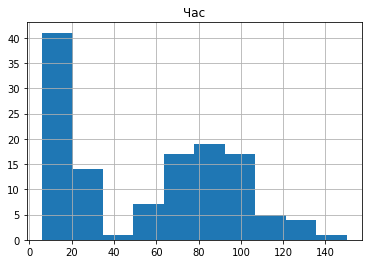

In [129]:
films_dataframe.hist('Час')

In [130]:
films_dataframe_less40 = films_dataframe[films_dataframe['Час'] < 40]
films_dataframe_less40

,Назва продукту,Жанр,Опис,Час,Рейтинг,Кількість голосних,Кількість приголосних,Сумарна кількість,Голосні/Приголосні
4,Повернутись зі світанком,драма,"Кримськотатарська історія про батька і сина, я...",19,4.6,38,45,83,0.457831
5,Схрон,"історичний,\n воєнний","Україна, 1946 рік. У криївці переховуються укр...",27,4.7,58,73,131,0.442748
7,Канікули,драма,"Розповідь про хлопця і дівчину, які полишають ...",31,2.0,191,236,427,0.447307
8,Чачьо,"драма,\n лгбтк",Януш виріс в консервативній ромській громаді у...,20,4.2,97,117,214,0.453271
9,YoYo. 1-й епізод: Baby cut — 4000,"антиутопія,\n трагікомедія",Надворі 2213 рік. Завдяки вбудованому AI люди ...,9,4.7,186,216,402,0.462687
11,Цілковита незнайомка,"маріуполь,\n експериментальний",Біль і розчарування від втрати близької людини...,13,3.9,85,110,195,0.435897
15,Бульмастиф,"драма,\n воєнний","Мітя – ветеран війни, який намагається поверну...",25,4.9,78,88,166,0.469880
21,Давай не сьогодні,комедія,Дід Льоша та баба Христя доживають свій вік у ...,18,4.3,73,97,170,0.429412
22,YoYo. 4-й епізод: Error,"антиутопія,\n трагікомедія","ЙоЙо та РобоДог у боулінгу — єдиному місці, де...",9,4.7,122,124,246,0.495935
25,Екзарх,"релігія,\n лгбтк",Молодий православний священик вирішив піти з К...,10,4.6,145,174,319,0.454545


In [131]:
films_dataframe_bigger40 = films_dataframe[films_dataframe['Час'] >= 40]
films_dataframe_bigger40

,Назва продукту,Жанр,Опис,Час,Рейтинг,Кількість голосних,Кількість приголосних,Сумарна кількість,Голосні/Приголосні
0,"Вперед, за скарбами гетьмана!","класика,\n комедія,\n містика",У давнину український гетьман відіслав зі свої...,88,4.0,116,153,269,0.431227
1,Погані дороги (дубляж),"драма,\n воєнний","П’ять розбитих доріг. П’ять історій про любов,...",124,4.7,46,59,105,0.438095
2,Аліса в Країні війни,воєнний,"Коли на Майдані починалася революція, Алісі бу...",76,0.0,269,306,575,0.467826
3,Людина з фотоапаратом,"трагікомедія,\n історичний",1990 - Українська Республіка стоїть на шляху с...,40,4.4,172,209,381,0.451444
6,Не все буде добре,"екологія,\n драма,\n київ",Адріан народився того ж року коли сталася Чорн...,82,5.0,342,396,738,0.463415
...,...,...,...,...,...,...,...,...,...
118,Мамай,драма,Козак-утікач закохується в приголомшливо вродл...,80,4.7,211,257,468,0.450855
119,"Земля блакитна, ніби апельсин",воєнний,"Фільм розповідає про сім’ю, яка живе в «червон...",74,4.6,170,202,372,0.456989
120,Вулкан,драмеді,Лукас вирушає на кордон з Кримом у складі моні...,106,4.6,115,126,241,0.477178
122,Фучжоу,"класика,\n драма,\n фантасмагорія","Придніпровські містечка й села в Україні, узбе...",120,5.0,148,168,316,0.468354


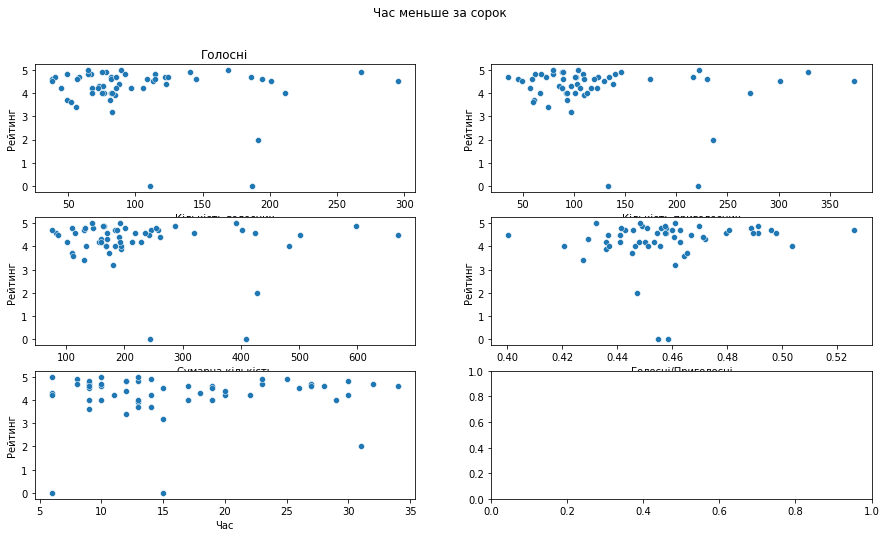

In [132]:

fig, axes = plt.subplots(3, 2, figsize = (15,8))

plt.suptitle('Час меньше за сорок')
axes[0,0].set_title('Голосні')
sns.scatterplot(data = films_dataframe_less40, x = films_dataframe_less40['Кількість голосних'], y =films_dataframe_less40['Рейтинг'], ax=axes[0,0])

sns.scatterplot(data = films_dataframe_less40, x = films_dataframe_less40['Кількість приголосних'], y =films_dataframe_less40['Рейтинг'], ax=axes[0,1])

sns.scatterplot(data = films_dataframe_less40, x = films_dataframe_less40['Сумарна кількість'], y =films_dataframe_less40['Рейтинг'], ax=axes[1,0])

sns.scatterplot(data = films_dataframe_less40, x = films_dataframe_less40['Голосні/Приголосні'], y =films_dataframe_less40['Рейтинг'], ax=axes[1,1])

sns.scatterplot(data = films_dataframe_less40, x = films_dataframe_less40['Час'], y =films_dataframe_less40['Рейтинг'], ax=axes[2 , 0])

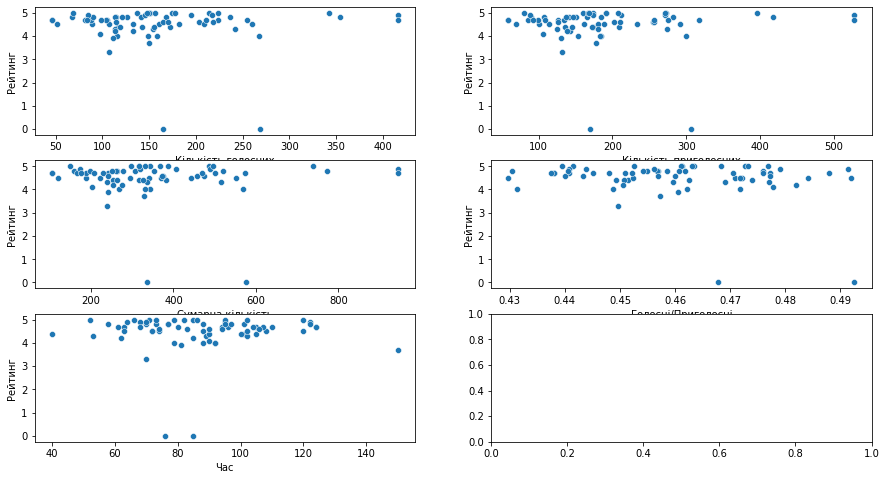

In [133]:
fig, axes = plt.subplots(3, 2,figsize = (15,8))


sns.scatterplot(data = films_dataframe_bigger40, x = films_dataframe_bigger40['Кількість голосних'], y =films_dataframe_bigger40['Рейтинг'], ax=axes[0,0])

sns.scatterplot(data = films_dataframe_bigger40, x = films_dataframe_bigger40['Кількість приголосних'], y =films_dataframe_bigger40['Рейтинг'], ax=axes[0,1])

sns.scatterplot(data = films_dataframe_bigger40, x = films_dataframe_bigger40['Сумарна кількість'], y =films_dataframe_bigger40['Рейтинг'], ax=axes[1,0])

sns.scatterplot(data = films_dataframe_bigger40, x = films_dataframe_bigger40['Голосні/Приголосні'], y =films_dataframe_bigger40['Рейтинг'], ax=axes[1,1])

sns.scatterplot(data = films_dataframe_bigger40, x = films_dataframe_bigger40['Час'], y =films_dataframe_bigger40['Рейтинг'], ax=axes[2 , 0])

In [134]:
descriptions = films_dataframe['Опис']
test_description = descriptions[4]
print(test_description)
vowels = 'АЕЄИІЇОУЮЯ'.lower()
consonants = 'БВГҐДЖ3ЙКЛМНПРСТФXЦЧШЩ'.lower()
print(vowels)

Кримськотатарська історія про батька і сина, які мають різні погляди на майбутнє і різне уявлення про життя.
аеєиіїоуюя


In [135]:
syllables = []
for i in test_description:
  if i in vowels:
    syllables.extend(i)
print(set(syllables))

{'е', 'і', 'ю', 'є', 'я', 'о', 'а', 'у', 'и'}


In [136]:
words = test_description.split(' ')
for word in words:
    for i,letter in enumerate(word):
      if word[i] in consonants and word[i+1] in vowels:
        syllable = word[i:i+2]
        syllables.append(syllable)
print(set(syllables))    


{'ю', 'є', 'рі', 'си', 'ні', 'не', 'о', 'ня', 'тя', 'и', 'на', 'ка', 'ро', 'ди', 'ко', 'ма', 'то', 'по', 'е', 'та', 'кі', 'а', 'нє', 'ри', 'бу', 'і', 'я', 'жи', 'ба', 'ля', 'ле', 'у'}


In [137]:
word = test_description.split()
for word in word:
    for i,letter in enumerate(word):
      if word[i] in consonants and word[i+1] in consonants and word[i+2] in vowels:
        syllable = word[i:i+3]
        syllables.append(syllable)
print(set(syllables)) 

{'ю', 'є', 'гля', 'рі', 'си', 'ні', 'не', 'о', 'ття', 'ня', 'тя', 'ння', 'и', 'на', 'ка', 'про', 'тнє', 'ро', 'ди', 'ко', 'ма', 'йбу', 'то', 'по', 'сто', 'е', 'та', 'кі', 'а', 'нє', 'ри', 'бу', 'і', 'я', 'вле', 'жи', 'ба', 'ля', 'ле', 'у'}


In [138]:
descriptions = films_dataframe['Опис']
test_description = descriptions[4]
print(test_description)
vowels = 'АЕЄИІЇОУЮЯ'.lower()
consonants = 'БВГҐДЖ3ЙКЛМНПРСТФXЦЧШЩ'.lower()
print(vowels)

Кримськотатарська історія про батька і сина, які мають різні погляди на майбутнє і різне уявлення про життя.
аеєиіїоуюя


In [139]:
def index_vowel(word):
  index =[]
  for vowel in vowels:
    idx = word.find(vowel)
    if idx != -1:
      index.append(idx)
  return None if len(index) == 0 else min(index)
  



In [140]:
def get_syllables(word):
  syllables = []
  idx_syllable_start = 0
  vowel_offset = index_vowel(word[idx_syllable_start:])
  while True:
    if vowel_offset is None:
      break
    next_vowel_offset = index_vowel(word[idx_syllable_start + vowel_offset+1:])
    if next_vowel_offset is None:
      idx_syllable_end = len(word)
    else:
      idx_syllable_end = vowel_offset +idx_syllable_start + 1
    syllable = word[idx_syllable_start:idx_syllable_end] 
    syllables.append(syllable)
    idx_syllable_start += vowel_offset +1
    vowel_offset = next_vowel_offset
  return syllables 

In [141]:
def get_description_syllables(description):
  description = description.lower()
  symbols = '!()?.,[]{}=+_-%#*":;/|\\\n\xa0'+"'"
  for symbol in symbols:
    description = description.replace(symbol,' ')

  words = description.split(' ')
  words = [word for word in words if word != '']
  description_syllables = []
  for word in words:
    word_syllables = get_syllables(word)
    description_syllables.extend(word_syllables)
  return description_syllables    

In [142]:
syllables = []
for d in films_dataframe['Опис']:
  syllables.extend(get_description_syllables(d)) 
print(syllables)

['у', 'да', 'вни', 'ну', 'у', 'кра', 'ї', 'нський', 'ге', 'тьман', 'ві', 'ді', 'слав', 'зі', 'сво', 'їм', 'си', 'ном', 'ска', 'рби', 'у', 'бри', 'та', 'нський', 'банк', 'спо', 'ді', 'ва', 'ю', 'чись', 'що', 'зго', 'дом', 'у', 'кра', 'ї', 'на', 'по', 'збу', 'де', 'ться', 'я', 'рма', 'то', 'ді', 'зо', 'ло', 'то', 'до', 'по', 'мо', 'же', 'на', 'ро', 'ду', 'по', 'ві', 'до', 'мив', 'він', 'си', 'но', 'ві', 'код', 'у', 'же', 'наш', 'час', 'за', 'на', 'ща', 'дком', 'ге', 'тьма', 'на', 'і', 'ва', 'ном', 'по', 'лу', 'бо', 'тком', 'хло', 'пцем', 'фле', 'гма', 'ти', 'чним', 'і', 'не', 'да', 'ле', 'ким', 'по', 'лю', 'ють', 'а', 'ге', 'нти', 'та', 'чу', 'жо', 'зе', 'мні', 'шпи', 'гу', 'ни', 'щоб', 'йо', 'го', 'до', 'по', 'мо', 'го', 'ю', 'здо', 'бу', 'ти', 'ска', 'рби', 'п’ять', 'ро', 'зби', 'тих', 'до', 'ріг', 'п’ять', 'і', 'сто', 'рій', 'про', 'лю', 'бов', 'не', 'на', 'висть', 'до', 'ві', 'ру', 'зра', 'ду', 'і', 'по', 'ру', 'ше', 'ння', 'о', 'со', 'би', 'стих', 'ко', 'рдо', 'нів', 'на', 'фо', 'ні

In [143]:
len(syllables)

17385

In [144]:
all_syllables = Counter(syllables).most_common(10)
print(all_syllables)
print(len(all_syllables))
small_all_syllables = [syll[0] for syll in all_syllables]


[('на', 444), ('є', 388), ('ї', 378), ('по', 295), ('го', 279), ('у', 259), ('ро', 259), ('і', 256), ('ти', 243), ('до', 242)]
10


In [145]:

def count_syllables(description, possible_syllables):
  description_syllables = get_description_syllables(description)
  syllable_count = [description_syllables.count(syll) for syll in possible_syllables]
  return(syllable_count)


In [146]:
all_syllable_count = [count_syllables(description,small_all_syllables) for description in films_dataframe['Опис'] ]

In [147]:
all_syllable_count = np.array(all_syllable_count)

In [148]:
vector_len = np.sqrt((all_syllable_count**2).sum(axis=1, keepdims=True))
all_syllable_count_normalized = all_syllable_count / vector_len

In [149]:
def dif_sylables(n,y,descriptions):
  all_syllables = Counter(syllables).most_common(10)
  small_all_syllables = [syll[0] for syll in all_syllables]
  def count_syllables(description):
    description_syllables = get_description_syllables(description)
    syllable_count = [description_syllables.count(syll) for syll in small_all_syllables]
    return(syllable_count)
  all_syllable_count = [count_syllables(description) for description in descriptions ]
  all_syllable_count = np.array(all_syllable_count)
  vector_len = np.sqrt((all_syllable_count**2).sum(axis=1, keepdims=True))
  all_syllable_count_normalized = all_syllable_count / vector_len
  x = all_syllable_count_normalized
  y = y
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
  model = LinearRegression()
  model.fit(x_train, y_train)
  y_pred_test= model.predict(x_test)
  r2_test = model.score(x_test, y_test)
  return y_pred_test, r2_test

In [150]:
y_pred_test, r2_test  = dif_sylables(2000,y = films_dataframe['Рейтинг'],descriptions =films_dataframe['Опис'] )

In [151]:
print(y_pred_test)
print(r2_test)

[4.33121632 3.96521816 4.37656473 4.42233854 4.31728342 4.26041001
 4.41492599 4.3876996  4.33531082 3.87312787 4.78160401 4.44674463
 4.50556383 4.0774838  4.68581804 4.44138121 4.629653   4.44214717
 3.89337665 4.1993538  4.48839192 4.07421514 4.49088803 3.98536367
 4.2504195  4.06855683]
-1.3597506649191278
